# 03-Linear Regression: Solutions

## 모듈 불러오기

In [10]:
# 데이터 전처리 패키지
import numpy as np
import pandas as pd

# 기계학습 모델 & 데이터 셋 & 성능 평가 패키지
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 경고 숨기기
import warnings
warnings.filterwarnings(action='ignore')

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

# !git clone https://github.com/hansam95/LG-Elec-Day1.git

## 데이터 불러오기

### Toyota Corolla Data (Toyota 중고차 가격 예측)

#### 설명변수
- Id : Record_ID
- Model : Model Description
- Age_08_04 : Age in months as in August 2004
- Mfg_Month : Manufacturing month (1-12)
- Mfg_Year : Manufacturing Year
- KM : Accumulated Kilometers on odometer
- Fuel_Type : Fuel Type (Petrol, Diesel, CNG)
- HP : Horse Power
- Met_Color : Metallic Color (Yes=1, No=0)
- Color : Color (Blue, Red, Grey, Silver, Black, etc.)
- Automatic : Automatic ( (Yes=1, No=0)
- CC : Cylinder Volume in cubic centimeters
- Doors : Number of doors
- Cylinders : Number of cylinders
- Gears : Number of gear positions
- Quarterly_Tax : Quarterly road tax in EUROs
- Weight : Weight in Kilograms
- Mfr_Guarantee : Within Manufacturer's Guarantee period (Yes=1, No=0)
- BOVAG_Guarantee : BOVAG (Dutch dealer network) Guarantee (Yes=1, No=0)
- Guarantee_Period : Guarantee period in months
- ABS : Anti-Lock Brake System (Yes=1, No=0)
- Airbag_1 : Driver_Airbag (Yes=1, No=0)
- Airbag_2 : Passenger Airbag (Yes=1, No=0)
- Airco : Airconditioning (Yes=1, No=0)
- Automatic_airco : Automatic Airconditioning (Yes=1, No=0)
- Boardcomputer : Boardcomputer (Yes=1, No=0)
- CD_Player : CD Player (Yes=1, No=0)
- Central_Lock : Central Lock (Yes=1, No=0)
- Powered_Windows : Powered Windows (Yes=1, No=0)
- Power_Steering : Power Steering (Yes=1, No=0)
- Radio : Radio (Yes=1, No=0)
- Mistlamps : Mistlamps (Yes=1, No=0)
- Sport_Model : Sport Model (Yes=1, No=0)
- Backseat_Divider : Backseat Divider (Yes=1, No=0)
- Metallic_Rim : Metallic Rim (Yes=1, No=0)
- Radio_cassette : Radio Cassette (Yes=1, No=0)
- Parking_Assistant : Parking assistance system (Yes=1, No=0)
- Tow_Bar : Tow Bar (Yes=1, No=0)

#### 반응변수
- Price : Offer Price in EUROs

In [11]:
data = pd.read_csv('data/ToyotaCorolla.csv')
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


## 데이터 전처리하기

### 데이터 행과 열 개수 확인

In [12]:
data.shape

(1436, 37)

### Column별 기초 통계량 확인

In [13]:
data.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 예측에 필요하지 않은 변수 제거
예측에 필요하지 않은 변수명: Id, Model, Fuel_Type

In [14]:
data = data.drop(['Id', 'Model', 'Fuel_Type'], axis=1)
data.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,13500,23,10,2002,46986,90,1,0,2000,3,...,1,1,1,0,0,0,1,0,0,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,1,0,1,0,0,0,1,0,0,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,1,0,0,0,1,0,0,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,1,0,0,0,1,0,0,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,1,1,1,0,1,0,1,0,0,0


### Training 데이터 70% / Testing 데이터 30% 로 나누기

In [15]:
train_data, test_data = train_test_split(data, test_size=0.3, random_state=55)

## 모델링

### 학습 데이터를 이용하여 선형회귀모델 학습 (상수항 미포함)

In [16]:
lm = sm.OLS(train_data['Price'], train_data.drop('Price', axis=1))
lm_trained = lm.fit()

### 모델 학습 결과 (Summary) 확인

In [17]:
lm_trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     375.5
Date:                Tue, 31 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:38:23   Log-Likelihood:                -8436.6
No. Observations:                1005   AIC:                         1.694e+04
Df Residuals:                     974   BIC:                         1.709e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age_08_04         -114.9816      4.017    -28.624      0.000    -122.865    -107.099
Mfg_Month          -93.2776     10.543     -8.848      0.000    -113.966     -72.589
Mfg_Year            -2.1563      0.848     -2.542      0.011      -3.821      -0.492
KM                  -0.0191      0.001    -15.524      0.000      -0.021      -0.017
HP                  18.5371      2.843      6.519      0.000      12.957      24.117
Met_Color         -103.0730     79.112     -1.303      0.193    -258.322      52.176
Automatic          195.8010    148.789      1.316      0.188     -96.183     487.785
cc                  -0.1373      0.076     -1.803      0.072      -0.287       0.012
Doors              -15.6624     41.785     -0.375      0.708     -97.662      66.337
Cylinders           -0.0389      0.002    -17.095      0.000      -0.043      -0.034
Gears              204.1533    187.482      1.089      0.276    -163.762     572.069
Quarterly_Tax        1.3659      1.478      0.924      0.356      -1.535       4.267
Weight              18.8386      1.431     13.165      0.000      16.030      21.647
Mfr_Guarantee      312.9440     77.283      4.049      0.000     161.283     464.605
BOVAG_Guarantee    679.1090    131.481      5.165      0.000     421.090     937.128
Guarantee_Period    76.7554     13.590      5.648      0.000      50.086     103.425
ABS               -414.1815    131.349     -3.153      0.002    -671.942    -156.421
Airbag_1          -325.9419    249.517     -1.306      0.192    -815.595     163.711
Airbag_2           161.7414    135.909      1.190      0.234    -104.967     428.450
Airco               85.6836     92.377      0.928      0.354     -95.598     266.965
Automatic_airco   2148.0897    193.528     11.100      0.000    1768.310    2527.870
Boardcomputer     -375.3768    123.072     -3.050      0.002    -616.893    -133.861
CD_Player          277.0970    104.093      2.662      0.008      72.825     481.369
Central_Lock      -246.8519    143.376     -1.722      0.085    -528.214      34.510
Powered_Windows    663.8474    143.354      4.631      0.000     382.530     945.165
Power_Steering    -397.8024    288.134     -1.381      0.168    -963.237     167.632
Radio              -47.4025     53.746     -0.882      0.378    -152.875      58.070
Mistlamps          -45.0181    114.003     -0.395      0.693    -268.738     178.702
Sport_Model        210.4336     91.325      2.304      0.021      31.217     389.650
Backseat_Divider   -85.2049    128.238     -0.664      0.507    -336.860     166.450
Metallic_Rim       236.9277     97.772      2.423      0.016      45.059     428.797
Radio_cassette     -47.4025     53.746     -0.882      0.378    -152.875      58.070
Tow_Bar           -100.1751     83.535     -1.199      0.231    -264.104      63.753
=======================

## 예측성능 평가

### 학습 데이터셋에 대한 예측성능 평가
MSE, RMSE, MAE, MAPE, R2 계산하여 성능 확인

In [18]:
train_pred = lm_trained.predict(train_data.drop(['Price'], axis=1))

print('Training MSE: {:.3f}'.format(mean_squared_error(train_data['Price'], train_pred)))
print('Training RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(train_data['Price'], train_pred))))
print('Training MAE: {:.3f}'.format(mean_absolute_error(train_data['Price'], train_pred)))
print('Training MAPE: {:.3f}'.format(mean_absolute_percentage_error(train_data['Price'], train_pred)))
print('Training R2: {:.3f}'.format(r2_score(train_data['Price'], train_pred)))

Training MSE: 1145614.264
Training RMSE: 1070.334
Training MAE: 821.326
Training MAPE: 8.238
Training R2: 0.920


### 테스트 데이터셋에 대한 예측성능 평가
MSE, RMSE, MAE, MAPE, R2 계산하여 성능 확인

In [19]:
test_pred = lm_trained.predict(test_data.drop(['Price'], axis=1))

print('Testing MSE: {:.3f}'.format(mean_squared_error(test_data['Price'], test_pred)))
print('Testing RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(test_data['Price'], test_pred))))
print('Testing MAE: {:.3f}'.format(mean_absolute_error(test_data['Price'], test_pred)))
print('Testing MAPE: {:.3f}'.format(mean_absolute_percentage_error(test_data['Price'], test_pred)))
print('Testing R2: {:.3f}'.format(r2_score(test_data['Price'], test_pred)))

Testing MSE: 1788162.286
Testing RMSE: 1337.222
Testing MAE: 878.352
Testing MAPE: 9.200
Testing R2: 0.824


## 변수 선택

### 선형회귀모델에서 유의하지 않은 변수가 있다면 제거

In [20]:
not_significants = lm_trained.pvalues.index[lm_trained.pvalues > 0.05]
print(not_significants)

train_data_new = train_data.drop(not_significants, axis=1)
test_data_new = test_data.drop(not_significants, axis=1)

## 직접 p-value를 보고 drop 함수를 통해 제거하기도 가능

Index(['Met_Color', 'Automatic', 'cc', 'Doors', 'Gears', 'Quarterly_Tax',
       'Airbag_1', 'Airbag_2', 'Airco', 'Central_Lock', 'Power_Steering',
       'Radio', 'Mistlamps', 'Backseat_Divider', 'Radio_cassette', 'Tow_Bar'],
      dtype='object')


### 변수 제거 후 모델 학습 결과 확인

In [21]:
lm_new = sm.OLS(train_data_new['Price'], train_data_new.drop('Price', axis=1))
lm_new_trained = lm_new.fit()
lm_new_trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     740.3
Date:                Tue, 31 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:38:34   Log-Likelihood:                -8450.3
No. Observations:                1005   AIC:                         1.693e+04
Df Residuals:                     989   BIC:                         1.701e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age_08_04         -115.6314      3.800    -30.426      0.000    -123.089    -108.174
Mfg_Month          -90.6937     10.489     -8.647      0.000    -111.276     -70.111
Mfg_Year            -2.0671      0.554     -3.728      0.000      -3.155      -0.979
KM                  -0.0192      0.001    -16.197      0.000      -0.022      -0.017
HP                  17.2131      2.524      6.821      0.000      12.261      22.165
Cylinders           -0.0384      0.002    -19.990      0.000      -0.042      -0.035
Weight              18.9293      0.907     20.877      0.000      17.150      20.709
Mfr_Guarantee      302.4229     75.048      4.030      0.000     155.152     449.694
BOVAG_Guarantee    663.7093    123.713      5.365      0.000     420.939     906.479
Guarantee_Period    74.9237     12.560      5.965      0.000      50.275      99.572
ABS               -378.9559    102.069     -3.713      0.000    -579.252    -178.660
Automatic_airco   2171.5832    178.458     12.169      0.000    1821.383    2521.783
Boardcomputer     -341.6030    119.268     -2.864      0.004    -575.650    -107.556
CD_Player          248.9382    100.217      2.484      0.013      52.275     445.602
Powered_Windows    427.6639     78.537      5.445      0.000     273.546     581.782
Sport_Model        247.5638     80.891      3.060      0.002      88.825     406.302
Metallic_Rim       260.6877     91.080      2.862      0.004      81.955     439.420
==============================================================================
Omnibus:                       44.307   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.491
Skew:                          -0.002   Prob(JB):                     3.79e-30
Kurtosis:                       4.799   Cond. No.                     8.19e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.1e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### 변수 제거 후 모델 예측성능 (학습/테스트) 확인

In [22]:
train_pred_new = lm_new_trained.predict(train_data_new.drop(['Price'], axis=1))

print('Training MSE: {:.3f}'.format(mean_squared_error(train_data_new['Price'], train_pred_new)))
print('Training RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(train_data_new['Price'], train_pred_new))))
print('Training MAE: {:.3f}'.format(mean_absolute_error(train_data_new['Price'], train_pred_new)))
print('Training MAPE: {:.3f}'.format(mean_absolute_percentage_error(train_data_new['Price'], train_pred_new)))
print('Training R2: {:.3f}'.format(r2_score(train_data_new['Price'], train_pred_new)))

Training MSE: 1177180.489
Training RMSE: 1084.979
Training MAE: 830.333
Training MAPE: 8.357
Training R2: 0.918


In [23]:
test_pred_new = lm_new_trained.predict(test_data_new.drop(['Price'], axis=1))

print('Testing MSE: {:.3f}'.format(mean_squared_error(test_data_new['Price'], test_pred_new)))
print('Testing RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(test_data_new['Price'], test_pred_new))))
print('Testing MAE: {:.3f}'.format(mean_absolute_error(test_data_new['Price'], test_pred_new)))
print('Testing MAPE: {:.3f}'.format(mean_absolute_percentage_error(test_data_new['Price'], test_pred_new)))
print('Testing R2: {:.3f}'.format(r2_score(test_data_new['Price'], test_pred_new)))

Testing MSE: 1730022.353
Testing RMSE: 1315.303
Testing MAE: 869.679
Testing MAPE: 9.110
Testing R2: 0.830


### 상관계수가 높은 설명변수들이 있다면 하나의 변수만 선택
변수별 상관계수 히트맵 출력

<AxesSubplot: >

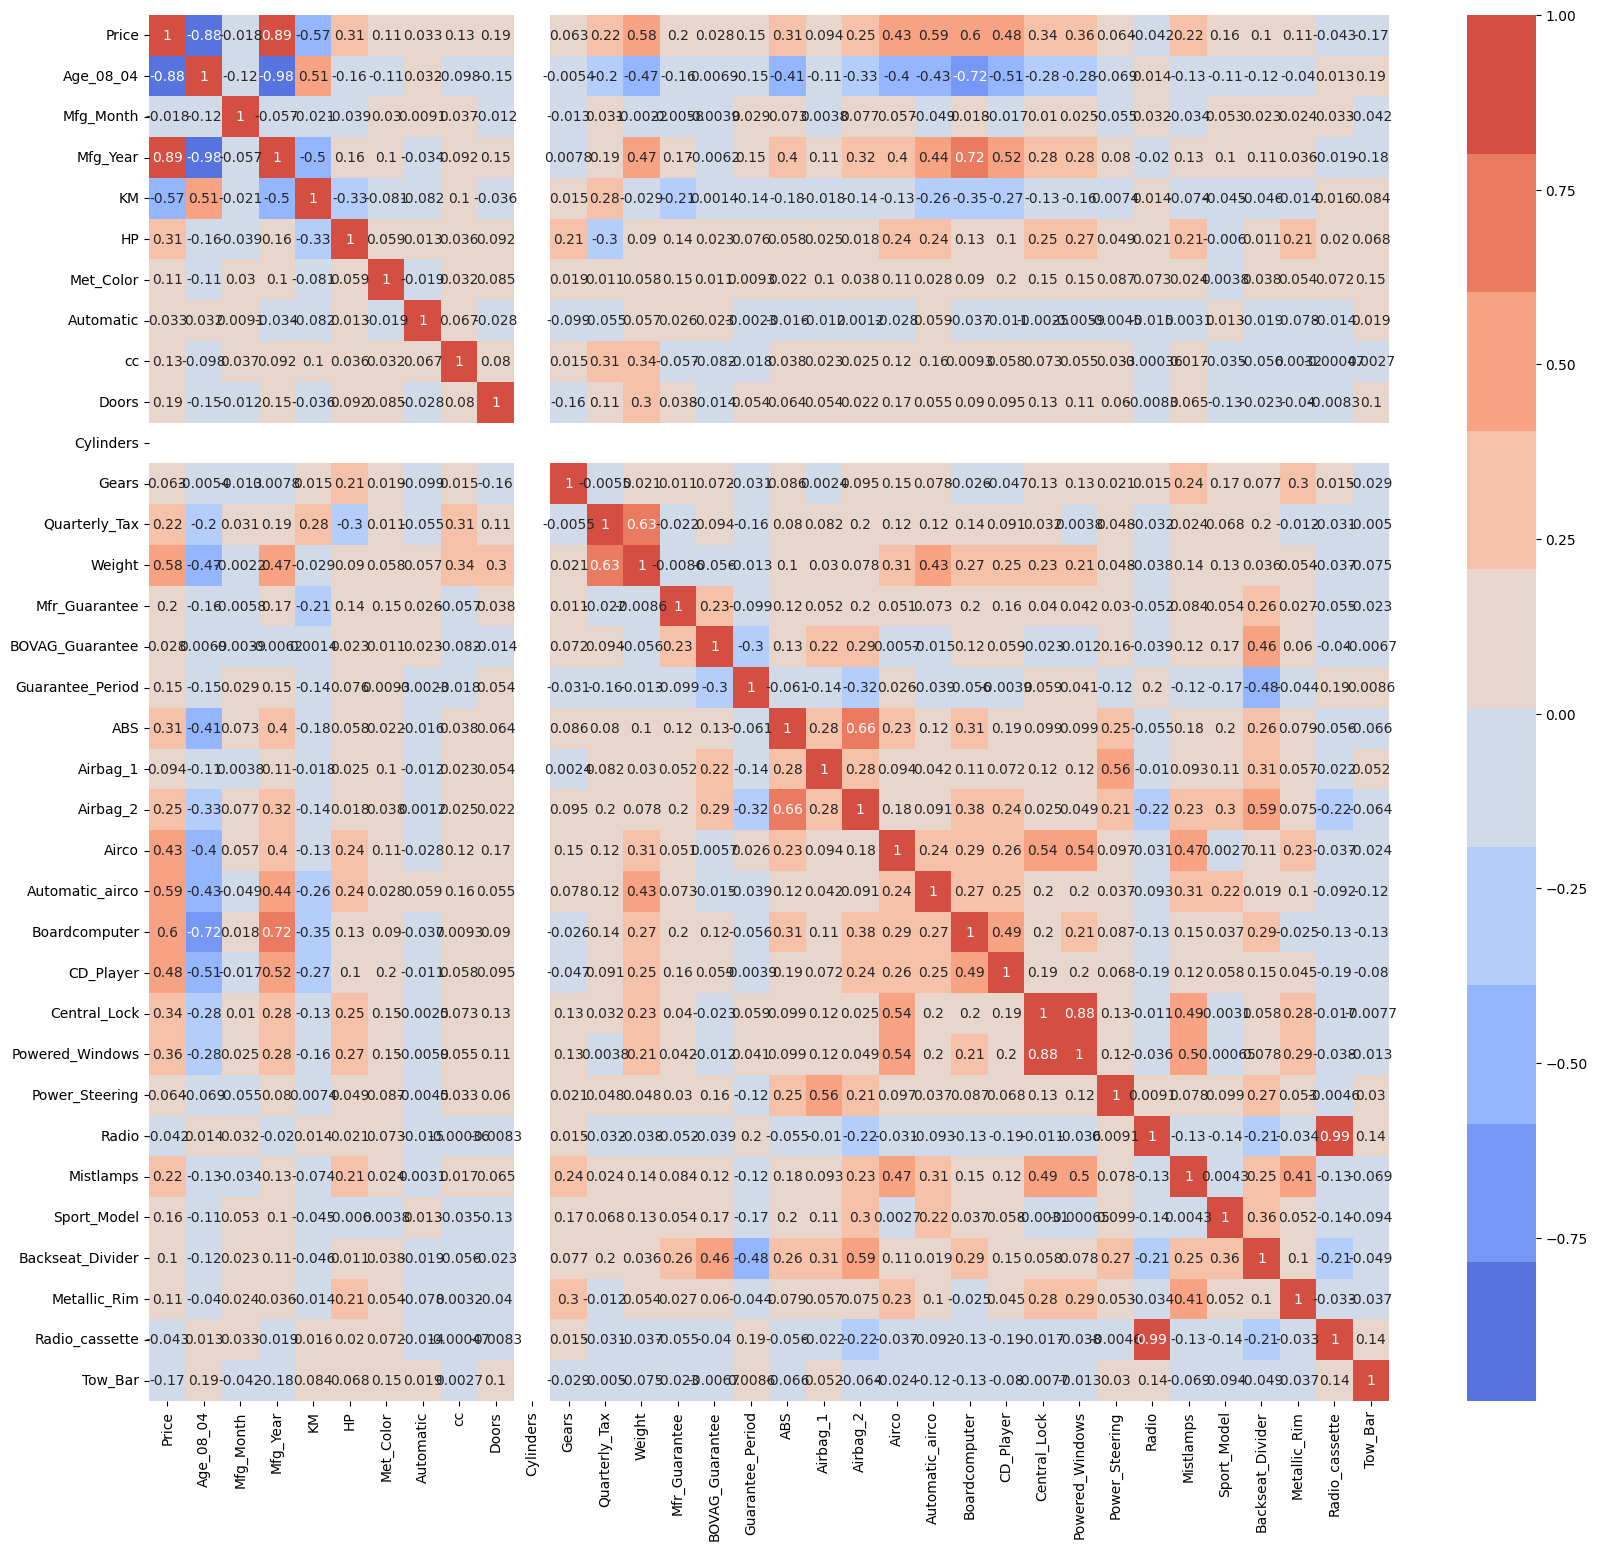

In [24]:
plt.figure(figsize=(20, 18))
sns.heatmap(data.corr(), cmap=sns.color_palette("coolwarm", 10), annot=data.corr())

상관계수가 높은 두 변수 중 하나의 변수만 선택하여 설명변수에서 제거 ('Radio_cassette', 'Central_Lock'는 예시입니다, 변경 가능)

In [25]:
train_data_new2 = train_data.drop(['Radio_cassette', 'Central_Lock'], axis=1)
test_data_new2 = test_data.drop(['Radio_cassette', 'Central_Lock'], axis=1)

### 변수 제거 후 모델 학습 결과 확인

In [26]:
lm_new2 = sm.OLS(train_data_new2['Price'], train_data_new2.drop('Price', axis=1))
lm_new2_trained = lm_new2.fit()
lm_new2_trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     387.5
Date:                Tue, 31 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:38:45   Log-Likelihood:                -8438.2
No. Observations:                1005   AIC:                         1.694e+04
Df Residuals:                     975   BIC:                         1.708e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age_08_04         -114.7619      4.019    -28.554      0.000    -122.649    -106.875
Mfg_Month          -92.3139     10.538     -8.760      0.000    -112.994     -71.634
Mfg_Year            -2.1090      0.849     -2.485      0.013      -3.774      -0.443
KM                  -0.0192      0.001    -15.654      0.000      -0.022      -0.017
HP                  18.4267      2.846      6.475      0.000      12.842      24.011
Met_Color         -110.1621     79.084     -1.393      0.164    -265.356      45.032
Automatic          191.4768    148.918      1.286      0.199    -100.759     483.713
cc                  -0.1397      0.076     -1.833      0.067      -0.289       0.010
Doors              -16.4879     41.824     -0.394      0.694     -98.564      65.588
Cylinders           -0.0386      0.002    -16.997      0.000      -0.043      -0.034
Gears              206.1380    187.667      1.098      0.272    -162.140     574.416
Quarterly_Tax        1.4010      1.480      0.947      0.344      -1.503       4.305
Weight              18.7388      1.431     13.092      0.000      15.930      21.548
Mfr_Guarantee      310.0280     77.342      4.009      0.000     158.251     461.805
BOVAG_Guarantee    685.2745    131.565      5.209      0.000     427.092     943.457
Guarantee_Period    76.1008     13.599      5.596      0.000      49.415     102.787
ABS               -422.8376    131.385     -3.218      0.001    -680.668    -165.007
Airbag_1          -319.4328    249.740     -1.279      0.201    -809.522     170.656
Airbag_2           184.2561    135.415      1.361      0.174     -81.482     449.994
Airco               73.4842     92.198      0.797      0.426    -107.445     254.414
Automatic_airco   2168.5593    193.357     11.215      0.000    1789.115    2548.003
Boardcomputer     -377.4997    123.189     -3.064      0.002    -619.246    -135.753
CD_Player          267.5889    104.051      2.572      0.010      63.400     471.778
Powered_Windows    477.1401     93.851      5.084      0.000     292.966     661.314
Power_Steering    -419.5494    288.147     -1.456      0.146    -985.008     145.910
Radio             -105.2503    107.429     -0.980      0.327    -316.070     105.569
Mistlamps          -72.1788    113.020     -0.639      0.523    -293.969     149.612
Sport_Model        205.6127     91.374      2.250      0.025      26.300     384.925
Backseat_Divider   -89.2073    128.346     -0.695      0.487    -341.074     162.660
Metallic_Rim       235.3976     97.867      2.405      0.016      43.344     427.451
Tow_Bar            -99.6176     83.618     -1.191      0.234    -263.710      64.474
==============================================================================
Omnibus:                       43.573   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.0

### 변수 제거 후 모델 예측성능 (학습/테스트) 확인

In [27]:
train_pred_new2 = lm_new2_trained.predict(train_data_new2.drop(['Price'], axis=1))

print('Training MSE: {:.3f}'.format(mean_squared_error(train_data_new2['Price'], train_pred_new2)))
print('Training RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(train_data_new2['Price'], train_pred_new2))))
print('Training MAE: {:.3f}'.format(mean_absolute_error(train_data_new2['Price'], train_pred_new2)))
print('Training MAPE: {:.3f}'.format(mean_absolute_percentage_error(train_data_new2['Price'], train_pred_new2)))
print('Training R2: {:.3f}'.format(r2_score(train_data_new2['Price'], train_pred_new2)))

Training MSE: 1149100.837
Training RMSE: 1071.961
Training MAE: 820.639
Training MAPE: 8.236
Training R2: 0.920


In [28]:
test_pred_new2 = lm_new2_trained.predict(test_data_new2.drop(['Price'], axis=1))

print('Testing MSE: {:.3f}'.format(mean_squared_error(test_data_new2['Price'], test_pred_new2)))
print('Testing RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(test_data_new2['Price'], test_pred_new2))))
print('Testing MAE: {:.3f}'.format(mean_absolute_error(test_data_new2['Price'], test_pred_new2)))
print('Testing MAPE: {:.3f}'.format(mean_absolute_percentage_error(test_data_new2['Price'], test_pred_new2)))
print('Testing R2: {:.3f}'.format(r2_score(test_data_new2['Price'], test_pred_new2)))

Testing MSE: 1772686.434
Testing RMSE: 1331.423
Testing MAE: 876.758
Testing MAPE: 9.176
Testing R2: 0.825
